### Analysis
This notebook is used to compare results obtained from MLDA and MHMCMC algorithms. 

Note: 
- To compute the chains run one of the python files: MCMC-benchmark.py, MCMC-not-logspace.py, MCMC-not-logspace_reduced_dim.py, MLDA-benchmark.py, MLDA-not-logspace-benchmark_reduced_dim.py or MLDA-not-logspace-benchmark.py.

In [13]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import arviz as az
import pickle 

### Load data
First we load it as a arviz inference Data object and then optionally as a dictionary containing ndarrays.

In [26]:
# load data arviz inference data
chains_MCMC = az.from_json('MCMC_chains_not_logspace\MCMC_chains_length_30000_numChains_2_h_1_64_finer_model_parallel.json')
with open('MCMC_chains_not_logspace\MCMC_chains_dict_length_30000_numChains_2_h_1_64_finer_model_parallel.pkl', 'rb') as f:
    chains_MCMC_dict = pickle.load(f)

chains_MLDA = az.from_json('MLDA_chains_not_logspace\MLDA_chains_length_30000_numChains_2_subrates_1_30_levels_0_1_2_finer_model_parallel.json')

# load chains that are stored in a dictionary
with open("MLDA_chains_not_logspace\MLDA_chains_dict_length_30000_numChains_2_subrates_1_30_levels_0_1_2_finer_model_parallel.pkl", 'rb') as f:
    chains_MLDA_dict = pickle.load(f)
    

' with open("MLDA_chains_not_logspace\\MLDA_chains_dict_length_100000_numChains_2_subrates_10_levels_1_2_MAP_pcN.pkl", \'rb\') as f:\n    chains_DA_pcN_dict = pickle.load(f)\nwith open("MLDA_chains_not_logspace\\MLDA_chains_dict_length_100000_numChains_2_subrates_10_levels_1_2_MAP_adaptive_Metrop.pkl", \'rb\') as f:\n    chains_DA_adaptive_Metrop_dict = pickle.load(f)\nwith open("MLDA_chains_not_logspace\\MLDA_chains_dict_length_100000_numChains_2_subrates_3_5_levels_0_1_2.pkl", \'rb\') as f:\n    chains_MLDA_adaptive_Metrop_dict = pickle.load(f) '

In [4]:
summary_DA

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta_0,-0.056,1.023,-2.089,1.549,0.269,0.194,15.0,12.0,1.09
theta_1,-0.164,0.621,-1.300,0.934,0.157,0.113,16.0,59.0,1.11
theta_2,0.021,0.511,-0.966,0.951,0.095,0.068,33.0,54.0,1.05
theta_3,-0.231,0.515,-1.173,0.650,0.121,0.087,19.0,90.0,1.09
theta_4,-0.079,0.512,-1.097,0.755,0.090,0.064,32.0,103.0,1.06
...,...,...,...,...,...,...,...,...,...
theta_59,0.030,0.622,-1.148,1.031,0.151,0.109,20.0,53.0,1.09
theta_60,-0.269,0.763,-1.632,0.897,0.204,0.148,19.0,79.0,1.09
theta_61,-0.154,0.760,-1.586,1.143,0.270,0.199,8.0,75.0,1.18
theta_62,-0.428,0.730,-1.970,0.642,0.179,0.129,16.0,52.0,1.11


In [5]:
summary_MLDA

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta_0,0.597,0.881,-1.174,2.111,0.278,0.202,13.0,10.0,1.26
theta_1,-0.154,0.531,-1.332,0.674,0.196,0.144,7.0,11.0,1.21
theta_2,-0.240,0.423,-1.171,0.404,0.137,0.100,9.0,20.0,1.16
theta_3,0.069,0.286,-0.450,0.618,0.050,0.036,31.0,62.0,1.05
theta_4,-0.126,0.402,-0.820,0.529,0.144,0.106,6.0,54.0,1.28
...,...,...,...,...,...,...,...,...,...
theta_59,0.148,0.548,-0.914,0.851,0.274,0.210,4.0,28.0,1.43
theta_60,-0.082,0.533,-0.953,0.804,0.247,0.187,5.0,14.0,1.38
theta_61,-0.109,0.632,-1.447,0.703,0.284,0.214,5.0,20.0,1.32
theta_62,-0.526,0.744,-2.065,0.671,0.237,0.294,14.0,8.0,1.43


### Paths

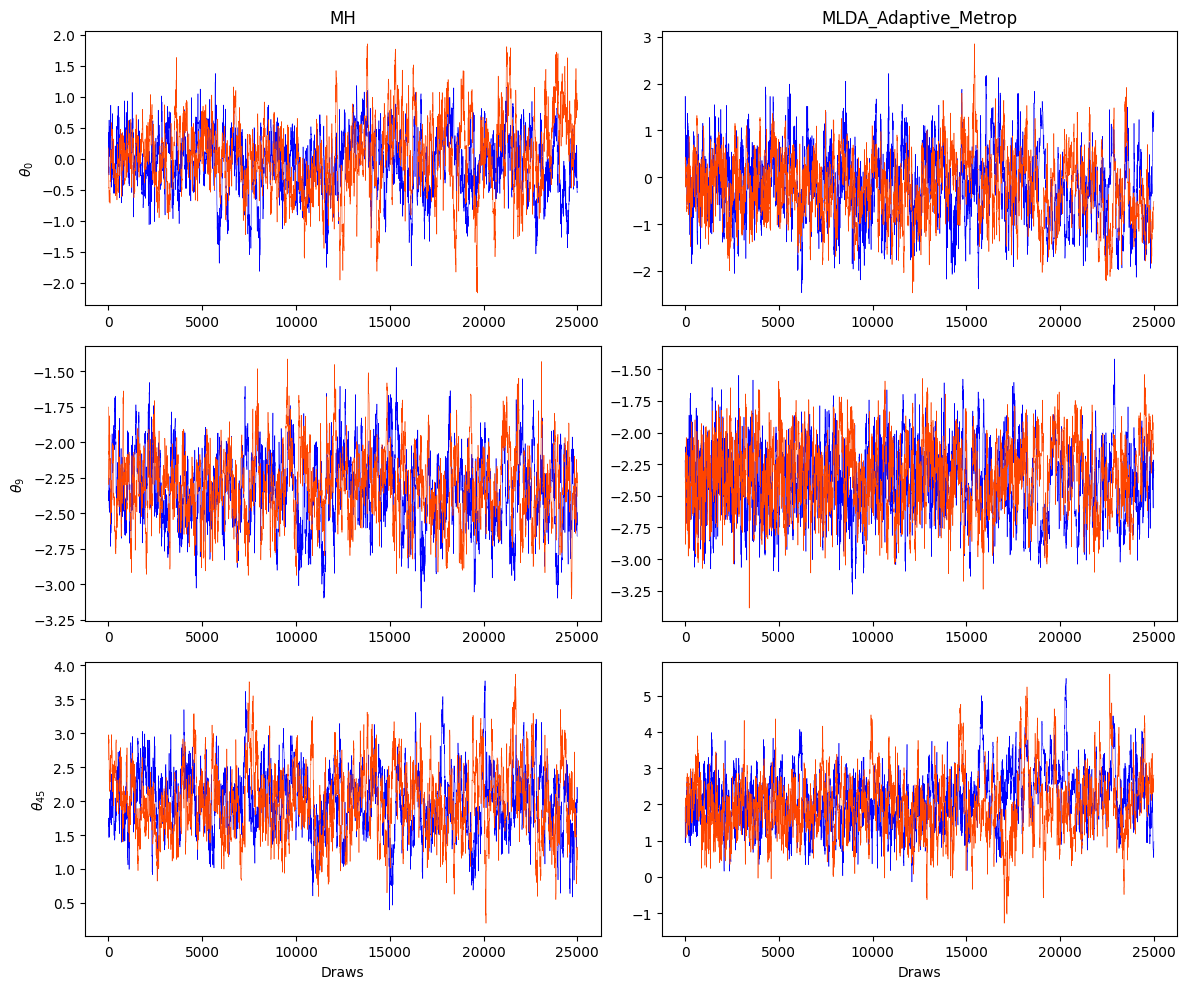

In [22]:
path_indices = [0,9,45] # allowed values are 0,...,63

fig ,axs = plt.subplots(nrows=len(path_indices), ncols=2, figsize=(12,10))

for idx, i in enumerate(path_indices):
    axs[idx,0].plot(chains_MCMC_dict['chain_0'][:,i],'b', linewidth=0.4)
    axs[idx,0].plot(chains_MCMC_dict['chain_1'][:,i], 'orangered', linewidth=0.4)
    axs[idx,1].plot(chains_MLDA_dict['chain_0'][:,i],'b', linewidth=0.4)
    axs[idx,1].plot(chains_MLDA_dict['chain_1'][:,i], 'orangered', linewidth=0.4)
    axs[idx,0].set_ylabel(r'$\theta_{%d}$'%i)

axs[0,0].set_title('MH')
axs[0,1].set_title('MLDA_Adaptive_Metrop')
axs[-1,0].set_xlabel('Draws')
axs[-1,1].set_xlabel('Draws')
fig.tight_layout()
#fig.savefig('plots/paths_MLDA.svg')


### Effective samples per second

In [27]:
# compute effective sample size
# divided by time it took to compute the samples (this is stored in a txt file)
MCMC_ess = az.ess(chains_MCMC)
MCMC_ess = MCMC_ess.to_array().to_numpy()
MCMC_ess_time = MCMC_ess/9862 # the correct time is stored in the TIME.txt file and has to be filled in by hand.


MLDA_ess_adaptive_metrop = az.ess(chains_MLDA)
MLDA_ess_adaptive_metrop = MLDA_ess_adaptive_metrop.to_array().to_numpy()
MLDA_ess_adaptive_metrop_time = MLDA_ess_adaptive_metrop/23923



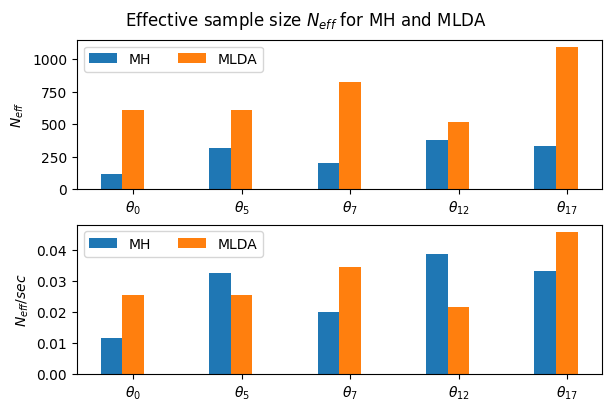

In [28]:
path_indices = [0,5,7,12,17] #choose which modes you want to plot (i=0,...,63)
theta = [r'$\theta_{%d}$'%d for d in path_indices]
N_eff = {
    'MH': MCMC_ess[path_indices],
    'MLDA': MLDA_ess_adaptive_metrop[path_indices]
}

N_eff_time = {
    'MH': MCMC_ess_time[path_indices],
    'MLDA': MLDA_ess_adaptive_metrop_time[path_indices]
}

x = np.arange(len(theta))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(nrows=2, figsize=(6,4), layout='constrained')

for attribute, measurement in N_eff.items():
    offset = width * multiplier
    rects = ax[0].bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

multiplier = 0
for attribute, measurement in N_eff_time.items():
    offset = width * multiplier
    rects = ax[1].bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_ylabel(r'$N_{eff}$')
ax[0].set_xticks(x + width, theta)
ax[0].legend(ncols=3)
ax[1].set_ylabel(r'$N_{eff}/sec$')
ax[1].set_xticks(x + width, theta)
ax[1].legend(ncols=3)

fig.suptitle(r'Effective sample size $N_{eff}$ for MH and MLDA')
#fig.savefig('plots/effective_samples.svg')
plt.show()